In [2]:
from __future__ import absolute_import, division, print_function 

In [3]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [13]:
from nltk.tokenize import sent_tokenize

In [4]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Set up logging**

In [79]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

**Prepare Corpus**

In [80]:
book_filenames = sorted(glob.glob("/home/aawasthi/word_vectors_GOT/data/*.txt"))
print(book_filenames)

['/home/aawasthi/word_vectors_GOT/data/got1.txt', '/home/aawasthi/word_vectors_GOT/data/got2.txt', '/home/aawasthi/word_vectors_GOT/data/got3.txt', '/home/aawasthi/word_vectors_GOT/data/got4.txt', '/home/aawasthi/word_vectors_GOT/data/got5.txt']


** Appending books into one string **

In [81]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '/home/aawasthi/word_vectors_GOT/data/got1.txt'...
Corpus is now 1770659 characters long

Reading '/home/aawasthi/word_vectors_GOT/data/got2.txt'...
Corpus is now 4071041 characters long

Reading '/home/aawasthi/word_vectors_GOT/data/got3.txt'...
Corpus is now 6391405 characters long

Reading '/home/aawasthi/word_vectors_GOT/data/got4.txt'...
Corpus is now 8107945 characters long

Reading '/home/aawasthi/word_vectors_GOT/data/got5.txt'...
Corpus is now 9719485 characters long



** Split the corpus into sentences **

In [82]:
corpus_raw = corpus_raw.lower()
raw_sentences = sent_tokenize(corpus_raw)
print("Number of sentences are: {0}".format(len(raw_sentences)))

Number of sentences are: 128796


In [83]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]", " ", raw)
    words = clean.split()
    return words

In [84]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [85]:
print(raw_sentences[0])
print(sentences[0])

this edition contains the complete text of the original hardcover edition.
[u'this', u'edition', u'contains', u'the', u'complete', u'text', u'of', u'the', u'original', u'hardcover', u'edition']


In [86]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


# Train Word2Vec

In [87]:
num_features = 300
min_word_count = 3

num_workers = multiprocessing.cpu_count()

context_size = 7

downsampling = 1e-3

seed = 1

In [88]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [89]:
thrones2vec.build_vocab(sentences)
print("Word2vec vocabulary length:", len(thrones2vec.vocab))

2017-02-07 10:52:48,200 : INFO : collecting all words and their counts
2017-02-07 10:52:48,201 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-07 10:52:48,247 : INFO : PROGRESS: at sentence #10000, processed 141048 words, keeping 9208 word types
2017-02-07 10:52:48,285 : INFO : PROGRESS: at sentence #20000, processed 279924 words, keeping 12015 word types
2017-02-07 10:52:48,322 : INFO : PROGRESS: at sentence #30000, processed 420494 words, keeping 14062 word types
2017-02-07 10:52:48,360 : INFO : PROGRESS: at sentence #40000, processed 556799 words, keeping 15467 word types
2017-02-07 10:52:48,397 : INFO : PROGRESS: at sentence #50000, processed 686550 words, keeping 16596 word types
2017-02-07 10:52:48,439 : INFO : PROGRESS: at sentence #60000, processed 828843 words, keeping 17820 word types
2017-02-07 10:52:48,478 : INFO : PROGRESS: at sentence #70000, processed 974402 words, keeping 18936 word types
2017-02-07 10:52:48,519 : INFO : PROGRESS: at s

Word2vec vocabulary length: 14733


In [90]:
thrones2vec.train(sentences)

2017-02-07 10:52:49,492 : INFO : training model with 32 workers on 14733 vocabulary and 300 features, using sg=1 hs=1 sample=0.001 and negative=0
2017-02-07 10:52:49,493 : INFO : expecting 128796 examples, matching count from corpus used for vocabulary survey
2017-02-07 10:53:19,334 : INFO : PROGRESS: at 0.08% examples, 25 words/s
2017-02-07 10:53:23,509 : INFO : PROGRESS: at 0.16% examples, 45 words/s
2017-02-07 10:53:25,559 : INFO : PROGRESS: at 0.23% examples, 66 words/s
2017-02-07 10:53:29,057 : INFO : PROGRESS: at 0.31% examples, 85 words/s
2017-02-07 10:53:30,397 : INFO : PROGRESS: at 0.62% examples, 174 words/s
2017-02-07 10:53:31,653 : INFO : PROGRESS: at 0.78% examples, 216 words/s
2017-02-07 10:53:32,737 : INFO : PROGRESS: at 0.85% examples, 234 words/s
2017-02-07 10:53:33,892 : INFO : PROGRESS: at 1.09% examples, 298 words/s
2017-02-07 10:53:34,979 : INFO : PROGRESS: at 1.40% examples, 383 words/s
2017-02-07 10:53:36,275 : INFO : PROGRESS: at 1.48% examples, 396 words/s
2017

1354555

In [91]:
if not os.path.exists("trained"):
    os.makedirs("trained")
    
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2017-02-07 11:19:00,110 : INFO : saving Word2Vec object under trained/thrones2vec.w2v, separately None
2017-02-07 11:19:00,111 : INFO : not storing attribute syn0norm
2017-02-07 11:19:00,112 : INFO : not storing attribute cum_table


** Explore the trained model. **

In [92]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

2017-02-07 11:19:00,403 : INFO : loading Word2Vec object from trained/thrones2vec.w2v
2017-02-07 11:19:00,754 : INFO : setting ignored attribute syn0norm to None
2017-02-07 11:19:00,755 : INFO : setting ignored attribute cum_table to None


** Compress the word vectors into 2D space and plot them **

In [93]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [94]:
all_word_vectors_matrix = thrones2vec.syn0

** Train t-SNE **

In [95]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [96]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [97]:
points.head(10)

,word,x,y
0,fawn,1.691883,-0.717180
1,raining,4.823827,-0.466408
2,longthorpe,-6.696493,-2.251455
3,writings,-4.298306,-1.314236
4,hordes,-1.048686,0.715707
5,mustachio,-6.803518,-1.567492
6,yellow,-3.115149,-2.973135
7,four,-2.193345,4.356922
8,prices,-2.189214,2.263162
9,woods,3.330357,-2.357526


In [98]:
sns.set_context('poster')

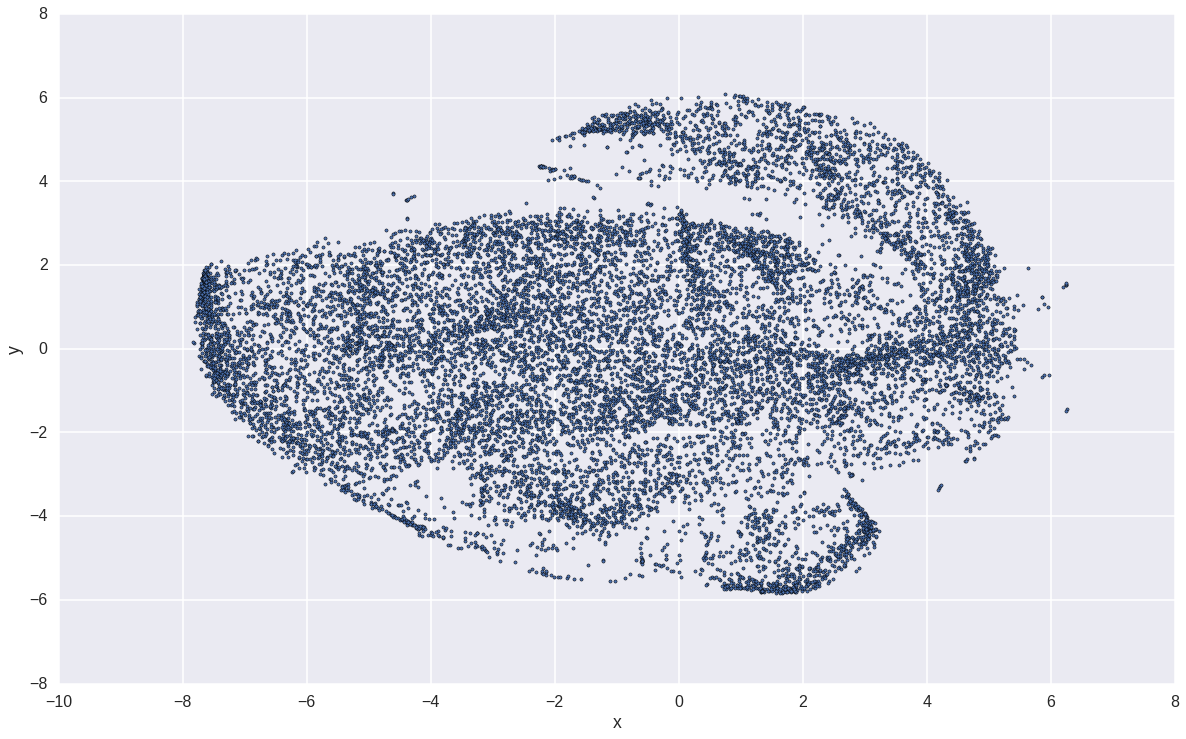

In [99]:
points.plot.scatter('x', 'y', s=10, figsize=(20, 12))

** Zooming in **

In [100]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter('x', 'y', s=35, figsize=(10,8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

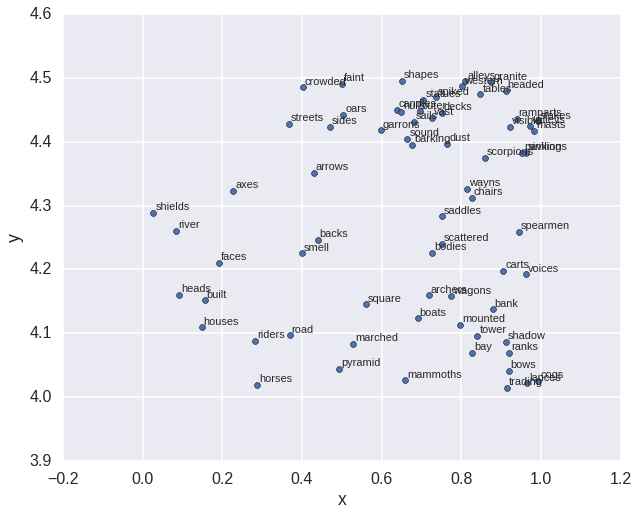

In [101]:
plot_region(x_bounds=(0,1), y_bounds=(4, 4.5))

** Explore Semantic similarities between book characters**             
Words closest to the given word 

In [103]:
thrones2vec.most_similar('stark')

[(u'eddard', 0.753822386264801),
 (u'arryn', 0.7418603897094727),
 (u'brandon', 0.7032301425933838),
 (u'robb', 0.6690875887870789),
 (u'catelyn', 0.6687096357345581),
 (u'winterfell', 0.6554602980613708),
 (u'benjen', 0.6181997060775757),
 (u'lysa', 0.609240710735321),
 (u'jonelle', 0.5890139937400818),
 (u'tully', 0.5855644941329956)]

In [104]:
thrones2vec.most_similar('aerys')

[(u'viserys', 0.8363345861434937),
 (u'usurper', 0.7876431345939636),
 (u'reign', 0.7822210192680359),
 (u'renly', 0.7780424952507019),
 (u'declaring', 0.7693769931793213),
 (u'rhaegar', 0.7613211870193481),
 (u'trystane', 0.7611837983131409),
 (u'dragonstone', 0.7607487440109253),
 (u'joffrey', 0.7567048668861389),
 (u'justice', 0.7460997104644775)]

In [105]:
thrones2vec.most_similar('snow')

[(u'connington', 0.5567634701728821),
 (u'jon', 0.5431480407714844),
 (u'tormund', 0.5033293962478638),
 (u'ghost', 0.4597700536251068),
 (u'falling', 0.4582429528236389),
 (u'plowing', 0.45184507966041565),
 (u'lightning', 0.44981589913368225),
 (u'direwolf', 0.4303150773048401),
 (u'ice', 0.41597118973731995),
 (u'bettley', 0.4141963720321655)]

In [106]:
thrones2vec.most_similar('targaryen')

[(u'stormborn', 0.7696942090988159),
 (u'aegon', 0.7012450695037842),
 (u'unburnt', 0.6999406814575195),
 (u'daenerys', 0.6930310726165771),
 (u'martell', 0.6779580116271973),
 (u'princess', 0.6757649183273315),
 (u'rhaegar', 0.6484435796737671),
 (u'prince', 0.6349887251853943),
 (u'dorne', 0.6226510405540466),
 (u'myrcella', 0.6194210052490234)]

In [107]:
thrones2vec.most_similar('drogo')

[(u'khal', 0.7316462993621826),
 (u'jommo', 0.722779393196106),
 (u'ogo', 0.6273171305656433),
 (u'khalakka', 0.6257888078689575),
 (u'rhaggat', 0.5911542177200317),
 (u'widowed', 0.5436356067657471),
 (u'ambitions', 0.5364695191383362),
 (u'aegons', 0.5340533256530762),
 (u'ward', 0.5259501934051514),
 (u'sixth', 0.5249972343444824)]

** Linear relationships between word pairs **

In [108]:
help(thrones2vec.most_similar_cosmul)

Help on method most_similar_cosmul in module gensim.models.word2vec:

most_similar_cosmul(self, positive=[], negative=[], topn=10) method of gensim.models.word2vec.Word2Vec instance
    Find the top-N most similar words, using the multiplicative combination objective
    proposed by Omer Levy and Yoav Goldberg in [4]_. Positive words still contribute
    positively towards the similarity, negative words negatively, but with less
    susceptibility to one large distance dominating the calculation.
    
    In the common analogy-solving case, of two positive and one negative examples,
    this method is equivalent to the "3CosMul" objective (equation (4)) of Levy and Goldberg.
    
    Additional positive or negative examples contribute to the numerator or denominator,
    respectively – a potentially sensible but untested extension of the method. (With
    a single positive example, rankings will be the same as in the default most_similar.)
    
    Example::
    
      >>> trained_mode

In [109]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(positive=[end2, start1], negative=[end1])
    start2 = similarities[0][0]
    print("{start1} is related to {end1} as {start2} is related to {end2}".format(**locals()))
    return start2

In [120]:
nearest_similarity_cosmul('stark', 'winterfell', 'landing')

stark is related to winterfell as joffrey is related to landing


u'joffrey'

In [122]:
nearest_similarity_cosmul('jaime', 'lannister', 'stark')

jaime is related to lannister as ned is related to stark


u'ned'

In [125]:
nearest_similarity_cosmul('daenerys', 'targaryen', 'stark')

daenerys is related to targaryen as catelyn is related to stark


u'catelyn'

In [135]:
nearest_similarity_cosmul('wine', 'tyrion', 'hodor')

wine is related to tyrion as mulled is related to hodor


u'mulled'